# Practica de Deep Learning

In [556]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re  # es para procesar texto y obtener los nombres o algo asi

In [67]:
df = pd.read_csv("/Users/tomasgarcia/PycharmProjects/LogisticReg/train-2.csv")

### EDA

In [70]:
df.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [72]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [74]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [82]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [76]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Data Cleaning

In [88]:
df.dropna(subset=['Embarked'], inplace=True)

In [104]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [118]:
df['Cabin'].nunique()

146

In [122]:
df = df.drop('Cabin', axis=1)

In [124]:
df.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 

In [271]:
df.columns
m = df.shape[0]

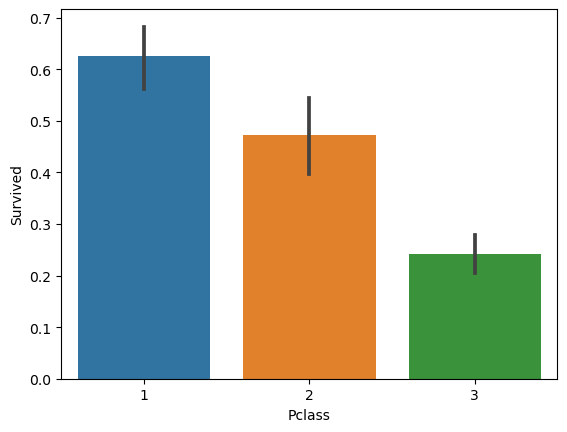

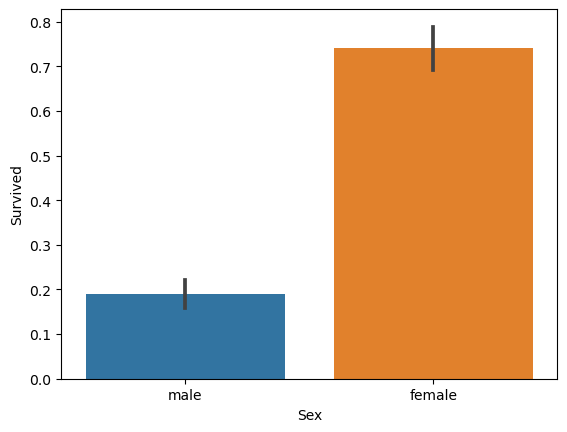

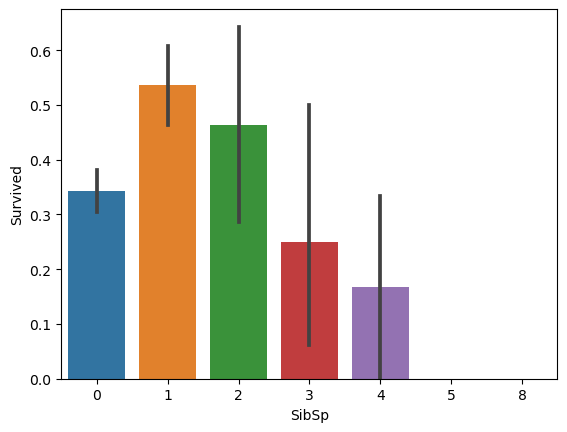

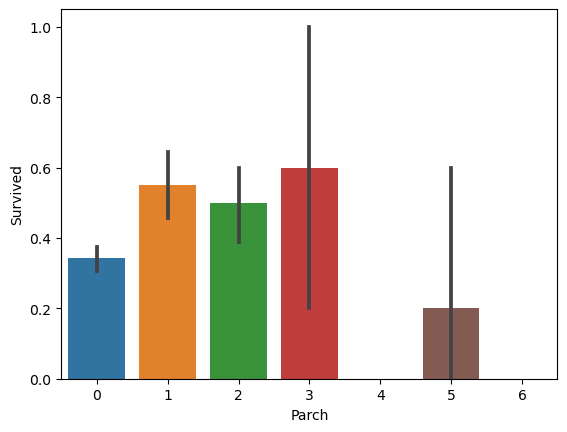

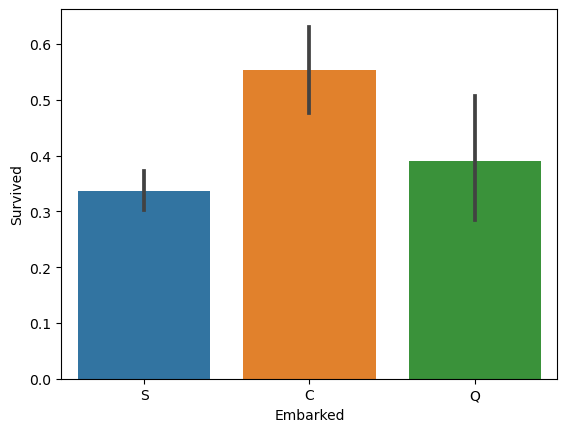

In [273]:
catCols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
j = 0
for i in catCols:
    plt.figure(j)
    sns.barplot(x = i, y = 'Survived', data = df)
    plt.show()
    j+=1

### Extract titles from names

In [276]:
def getTitles(names):
    titleRegex = re.compile(r',.\w+\.')    
    title = []
    for str in names:
        titlePat = re.search(titleRegex,str)
        if titlePat is None:
            title.append(str)
        else:
            x = titlePat.group()
            x = x[2:len(x)-1]
            title.append(x)
    return title


title = getTitles(df['Name'])

In [278]:
set(title)

{'Capt',
 'Col',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)',
 'Sir'}

In [280]:
def getCleanTitles(title):
    for i in range(len(title)):
        if title[i] in ['Don', 'Sir', 'Jonkheer']:
            title[i] = 'Noble'
        elif title[i] in ['Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)', 'Lady', 'Dona']:
            title[i] = 'Noble'
        elif title[i] in ['Mlle', 'Ms']:
            title[i] = 'Miss'
        elif title[i] == 'Mme':
            title[i] = 'Mrs'
        elif title[i] in ['Capt', 'Col', 'Dr', 'Major', 'Rev']:
            title[i] = 'Other'
    return title

df['Title'] = getCleanTitles(title)

In [282]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,num_family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,0


In [284]:
df.groupby('Title').Age.mean()

Title
Master     7.086662
Miss      23.294393
Mr        31.753762
Mrs       34.751080
Noble     41.600000
Other     45.761062
Name: Age, dtype: float64

In [286]:
df['Age'].fillna(df.groupby('Title')['Age'].transform("mean"), inplace=True)

## Add variable for number of family members on board¶
### The chances of survival go up for families. To find if someone is alone, we check if the sum of SibSp and Parch is 0.

In [289]:
num_family = (df['Parch'] + df['SibSp']).astype(int)

In [291]:
df['num_family'] = num_family

In [311]:
max(num_family)

10

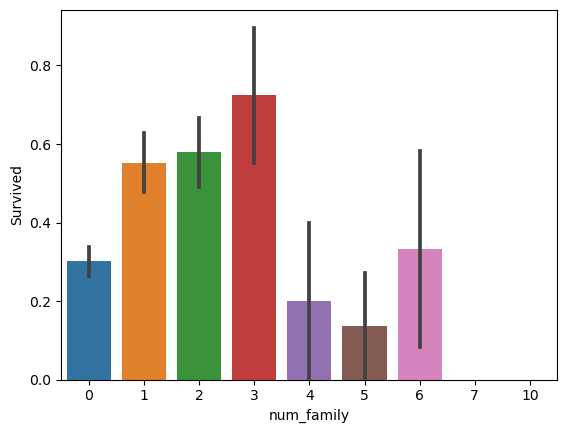

In [309]:
sns.barplot(x = df['num_family'], y = df['Survived'])
plt.show()

In [313]:
catCols.extend(['Title', 'num_family'])

In [315]:
catCols

['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 'num_family']

In [329]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [331]:
def convertCatValToNum(catVal):
    le = LabelEncoder()
    le.fit(catVal)
    catVal = le.transform(catVal)
    return catVal


for i in catCols:
    df[i] = convertCatValToNum(df[i])

In [336]:
Xcols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'num_family']

In [338]:
scaler = MinMaxScaler()
scaler.fit(df[Xcols])
X = scaler.transform(df[Xcols])

In [341]:
# Check if the features have been correctly scaled

X_stats = pd.DataFrame()
X_stats['Min'] = np.min(X, axis = 0)
X_stats['Max'] = np.max(X, axis = 0)
X_stats['Mean'] = np.mean(X, axis = 0)
X_stats

,Min,Max,Mean
0,0.0,1.0,0.655793
1,0.0,1.0,0.649044
2,0.0,1.0,0.367347
3,0.0,1.0,0.084739
4,0.0,1.0,0.063742
5,0.0,1.0,0.062649
6,0.0,1.0,0.767717
7,0.0,1.0,0.383127
8,0.0,1.0,0.111361


In [347]:
# si usamos "y = df['Survived']", y.share nos dara (889,) en lugar de (889,1)... para que eso no
# suceda hay que usar el siguiente metodo

In [359]:
y = np.expand_dims(df[:m].Survived.values,1)

In [361]:
y.shape

(889, 1)

In [363]:
# Save preprocessed data to file

X_file = 'X.npy'
#np.save(X_file, X)

y_file = 'y.npy'
#np.save(y_file, y)

In [367]:
# Set random seed

seed = 2
np.random.seed(seed)

# Get random training index

train_index = np.random.choice(m, round(m*0.9), replace=False)
dev_index = np.array(list(set(range(m)) - set(train_index)))

test_index = range(m, df.shape[0])
# Make training and dev


X_train = X[train_index]
X_dev = X[dev_index]
X_test = X[test_index]

y_train = y[train_index]
y_dev = y[dev_index]

In [370]:
X_train.shape, X_dev.shape, y_train.shape, y_dev.shape

((800, 9), (89, 9), (800, 1), (89, 1))

In [372]:
# es buena practica chequear las dimensiones para evitar que luego el algoritmo
# no pueda compilar por cosas raras

In [410]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [426]:
import tensorflow as tf

In [428]:
# Initialize placeholders for data
n = X.shape[1]
x = tf.placeholder(dtype=tf.float32, shape=[None, n], name = 'inputs_ph')
y = tf.placeholder(dtype=tf.float32, shape=[None, 1], name = 'labels_ph')

AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [ ]:
# dado que los placeholders no existen mas y que hay que cambiar algunas cosas, a partir de aca
# voy a ir implementando las cosas como yo se y luego contrastare el resultado final y probare mi
# red neuronal. Obviamente que sirve ir viendo lo otro como referencia y tmb como ayuda a la hora de 
# setear los hiperparametros y todo el tema de la arquitectura de la red neuronal.

In [434]:
from tensorflow.keras.initializers import GlorotNormal

In [438]:
# se declara un metodo inicializador de parametros que usa el GlorotNormal y luego se crea
# un diccionario que contiene los argumentos de cada layer (esto es: el numero de unidades
# y todo eso..

In [476]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [500]:
model = Sequential(
[Dense(units=60, activation='relu'),
 Dense(units=50, activation='relu'),
 Dense(units=35, activation='relu'),
 Dense(units=1, activation='sigmoid')
])

In [520]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam

# Definir el optimizador con la tasa de aprendizaje deseada
learning_rate = 0.001  # Puedes ajustar este valor según sea necesario
optimizer = Adam(learning_rate=learning_rate)

# Compilar el modelo con el optimizador y la función de pérdida
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [522]:
model.fit(X_train, y_train, epochs=100, batch_size=52, validation_split=0.1)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8568 - loss: 0.3223 - val_accuracy: 0.8625 - val_loss: 0.3606
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8544 - loss: 0.3447 - val_accuracy: 0.8625 - val_loss: 0.3688
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8438 - loss: 0.3512 - val_accuracy: 0.8500 - val_loss: 0.3581
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8343 - loss: 0.3668 - val_accuracy: 0.8500 - val_loss: 0.3640
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8461 - loss: 0.3584 - val_accuracy: 0.8500 - val_loss: 0.3650
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8413 - loss: 0.3362 - val_accuracy: 0.8625 - val_loss: 0.3580
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8659 - loss: 0.3243 - val_accuracy: 0.8500 - val_loss: 0.3675
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8574 - loss: 0.3423 - val_accuracy: 0.8500 - v

In [524]:
# Suponiendo que tienes datos de entrada X_dev y etiquetas y_dev para tu conjunto de desarrollo

# Evaluar el modelo en el conjunto de desarrollo
loss, accuracy = model.evaluate(X_dev, y_dev)

# Imprimir los resultados
print("Loss en el conjunto de desarrollo:", loss)
print("Precisión en el conjunto de desarrollo:", accuracy)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8610 - loss: 0.3505 
Loss en el conjunto de desarrollo: 0.4246833324432373
Precisión en el conjunto de desarrollo: 0.8314606547355652


In [550]:
# Supongamos que tienes las predicciones del modelo y las etiquetas reales
y_pred = model.predict(X_dev)
y_pred_binary = (y_pred > 0.5)  # Convertir las probabilidades en etiquetas binarias (0 o 1)

# Calcular el recall manualmente
true_positives = sum((y_dev == 1) & (y_pred_binary == 1))
false_negatives = sum((y_dev == 1) & (y_pred_binary == 0))
recall = true_positives / (true_positives + false_negatives)

print("Recall:", recall)



# Calcular el recall manualmente
true_positives = sum((y_dev == 1) & (y_pred_binary == 1))
false_negatives = sum((y_dev == 1) & (y_pred_binary == 0))
recall = true_positives / (true_positives + false_negatives)

print("Recall:", recall)



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Recall: [0.76470588]
Recall: [0.76470588]


In [554]:
from sklearn.ensemble import RandomForestClassifier
#contrstar con un randomforest

rfclassifier = RandomForestClassifier(n_estimators = 100, max_features = 3)
rfclassifier.fit(X_train, y_train) 

y_train_preds_rf = np.expand_dims(rfclassifier.predict(X_train),1)
train_acc_rf = np.mean(y_train == y_train_preds_rf)
print('Train Accuracy for Random Forest: {:5f}'.format(train_acc_rf))

Train Accuracy for Random Forest: 0.985000


/var/folders/6v/yhkmwbbs7fdc8yd8t1h__l980000gn/T/ipykernel_55608/3631871096.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfclassifier.fit(X_train, y_train)
